# Inferential Statistics

In [4]:
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
sns.set(color_codes=True)

## Uniform Distribution

In [5]:
from scipy.stats import uniform

In [7]:
data_uniform = uniform.rvs(size=10000,loc=10,scale=10)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


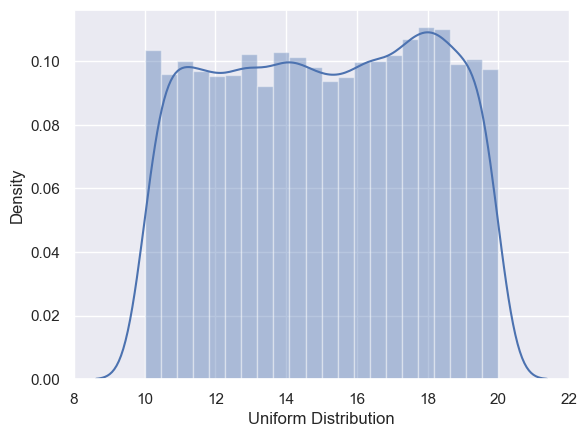

In [93]:
sns.distplot(data_uniform)
plt.xlabel('Uniform Distribution')
plt.show()

## Normal Distribution

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

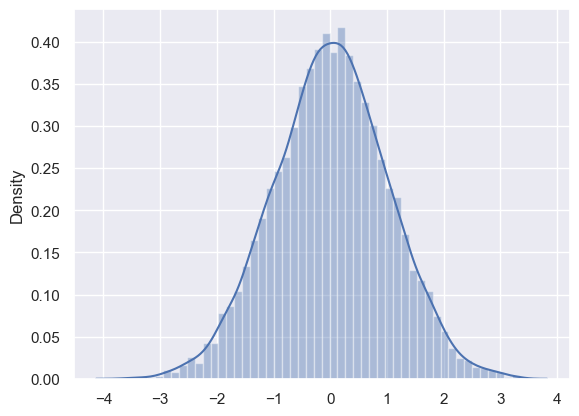

In [9]:
from scipy.stats import norm

data_normal = norm.rvs(size=10000,loc=0,scale=1)
sns.distplot(data_normal)

## Gamma Distribution

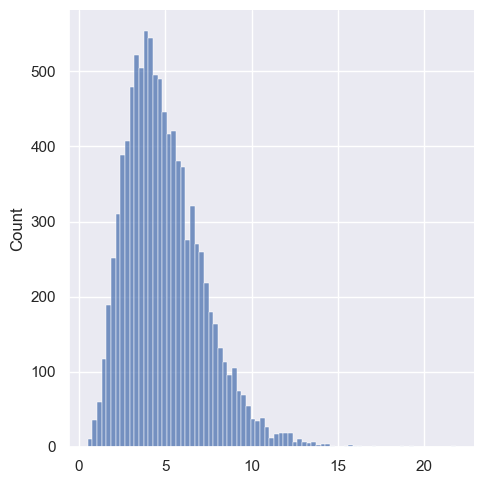

In [10]:
from scipy.stats import gamma

data_gamma = gamma.rvs(size=10000,a=5)
sns.displot(data_gamma)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

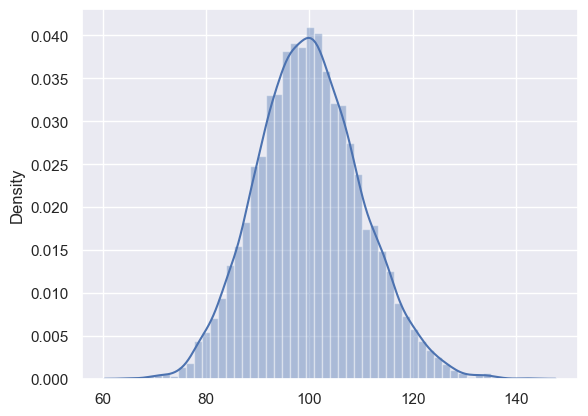

In [94]:
data_gamma = gamma.rvs(size=10000,a=100)
sns.distplot(data_gamma)

## Exponential Distribution

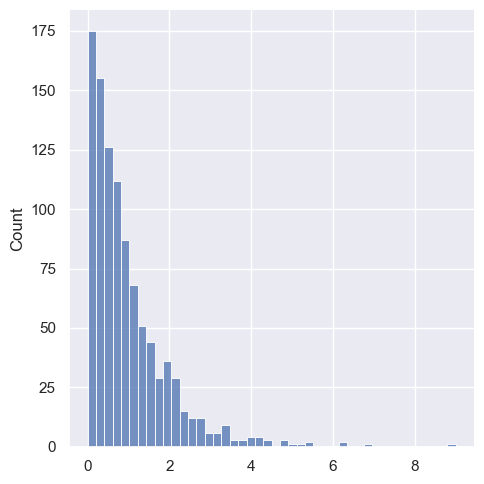

In [11]:
from scipy.stats import expon

data_expon = expon.rvs(scale=1,loc=0,size=1000)
sns.displot(data_expon)

## Poisson Distribution

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Poisson Distribution (Count Data)')

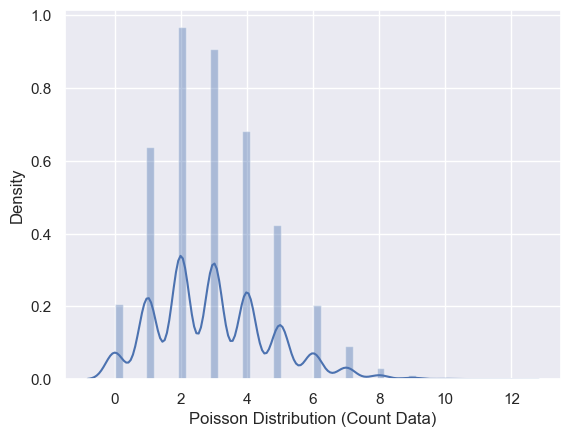

In [96]:
from scipy.stats import poisson

data_poisson = poisson.rvs(mu=3,size=10000)
sns.distplot(data_poisson)
plt.xlabel('Poisson Distribution (Count Data)')

## Binomial Distribution

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

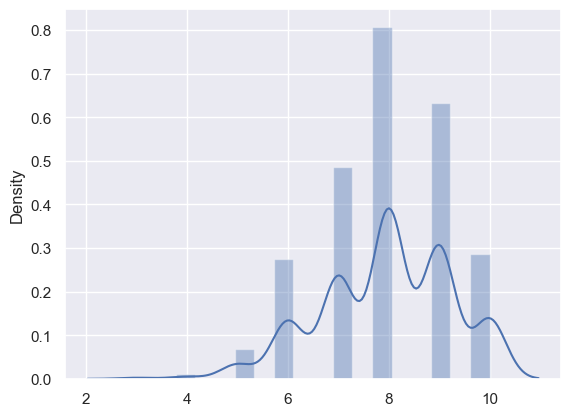

In [16]:
from scipy.stats import binom

data_binom = binom.rvs(n=10,p=0.8,size=1000)
sns.distplot(data_binom)

## Bernoulli Distribution

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

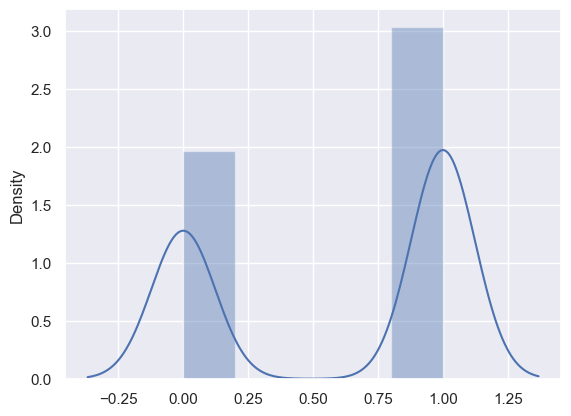

In [19]:
from scipy.stats import bernoulli

data_bern = bernoulli.rvs(size=1000,p=0.6)
sns.distplot(data_bern)

## Confidence Interval

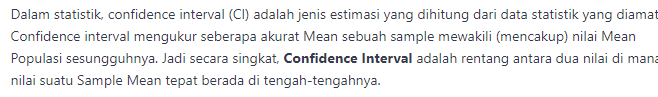

### Confidence Interval for Population Proportion

In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
def sex_label(x):
    if x==1:
        return 'Male'
    else:
        return 'Female'

In [25]:
df['sex_label'] = df['sex'].apply(sex_label)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_label
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   sex        1025 non-null   int64  
 2   cp         1025 non-null   int64  
 3   trestbps   1025 non-null   int64  
 4   chol       1025 non-null   int64  
 5   fbs        1025 non-null   int64  
 6   restecg    1025 non-null   int64  
 7   thalach    1025 non-null   int64  
 8   exang      1025 non-null   int64  
 9   oldpeak    1025 non-null   float64
 10  slope      1025 non-null   int64  
 11  ca         1025 non-null   int64  
 12  thal       1025 non-null   int64  
 13  target     1025 non-null   int64  
 14  sex_label  1025 non-null   object 
dtypes: float64(1), int64(13), object(1)
memory usage: 120.2+ KB


In [30]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
sex_label    0
dtype: int64

In [31]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [32]:
df.groupby(['sex_label','target'])[['target']].count()

target
sex_label target        
Female    0           86
          1          226
Male      0          413
          1          300

In [97]:
n = 86+226
pro_fm = 226/n
print(n,pro_fm)

312 0.7243589743589743


In [98]:
stderror_fm = (pro_fm*(1-pro_fm)/n)**(1/2)
stderror_fm

0.02529714756803247

Gunakan confidence interval 95% >> z-score = 1.96

In [99]:
z_score = 1.96
low_ci_fm = pro_fm - (z_score*stderror_fm)
up_ci_fm = pro_fm + (z_score*stderror_fm)
print(low_ci_fm,up_ci_fm)

0.6747765651256307 0.773941383592318


In [100]:
 print('Margin Error=',(z_score*stderror_fm))

Margin Error= 0.049582409233343644


## Contoh Lain

In [43]:
import scipy.stats as stats
import random
import warnings

Generate Massa Populasi dalam Pounds dibagi menjadi wanita dan pria

In [102]:
normal_distribution_male = norm.rvs(loc=181,scale=24,size=6000)
normal_distribution_fem = norm.rvs(loc=132,scale=22,size=6500)
all_mass = np.concatenate([normal_distribution_male,normal_distribution_fem],axis=0)
df_mass = pd.DataFrame(all_mass,columns=['people_mass'])
df_mass

,people_mass
0,162.236569
1,185.564416
2,159.451719
3,184.981352
4,168.195436
...,...
12495,140.226417
12496,139.072630
12497,109.600795
12498,120.387179


In [103]:
len(normal_distribution_male)

6000

In [104]:
len(normal_distribution_female)

6500

In [52]:
len(all_mass)

12500

In [105]:
warnings.filterwarnings('ignore')

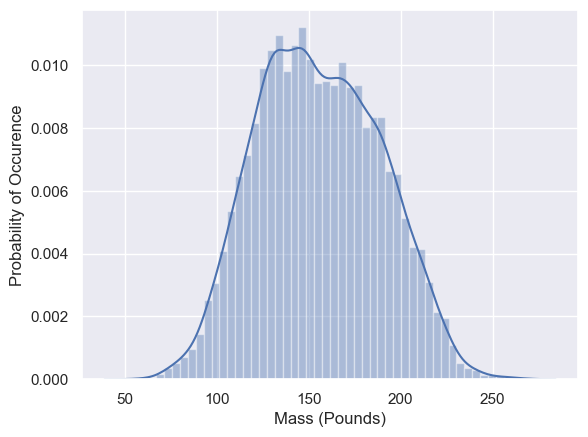

In [106]:
sns.distplot(df_mass['people_mass'])
plt.ylabel('Probability of Occurence')
plt.xlabel('Mass (Pounds)')
plt.show()

In [107]:
#Mean
population_mean = df_mass['people_mass'].mean()
population_mean

155.4888309392044

In [108]:
# Standard Deviation
population_std = df_mass['people_mass'].std(ddof=1)
population_std

33.442091692272136

Mengambil 250 sampel, masing-masing sebanyak 30 orang per sampel

In [109]:
n = 30
sample_means=[]
for sample in range(0,250):
    sample_values= df_mass['people_mass'].sample(n)
    sample_mean = sample_values.mean()
    sample_means.append(sample_mean)

<AxesSubplot:ylabel='Density'>

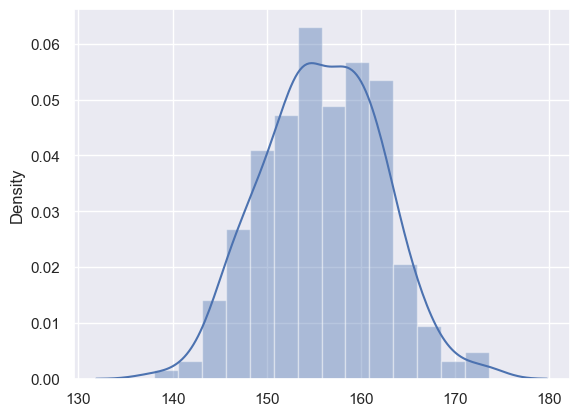

In [111]:
sns.distplot(sample_means)

In [112]:
df_mass['people_mass'].sample(10)

780      199.663072
12116    150.743738
6744     155.264400
6755     157.313985
10328    104.345837
10619    107.891023
7379     136.276365
959      209.646892
5378     199.108380
11608    108.394942
Name: people_mass, dtype: float64

In [113]:
mean_of_sample_means = np.mean(sample_means)
median_of_sample_means = np.median(sample_means)
mean_of_sample_means, median_of_sample_means

(155.91547299591713, 155.83026989596857)

In [114]:
population_mean

155.4888309392044

In [115]:
std_of_sample_means = np.std(sample_means)
std_of_sample_means

6.195506454054892

## Standard Error

In [116]:
standard_error = population_std/np.sqrt(n)
standard_error

6.105662663337855

In [117]:
std_of_sample_means

6.195506454054892

Sampel memiliki karakteristik yang sama dengan populasi.

## Visualisasi Area Confidence Interval

In [70]:
stats.norm.cdf(2.17)

0.9849965770262678

In [72]:
z = 1.96

In [73]:
lower_bound = mean_of_sample_means - z * standard_error
lower_bound

142.32032106854038

In [75]:
upper_bound = mean_of_sample_means + z * standard_error
upper_bound

166.49420898653963

Text(152, 0.01, 'Shaded area are \npart of the \nconfidence intervals \n95%')

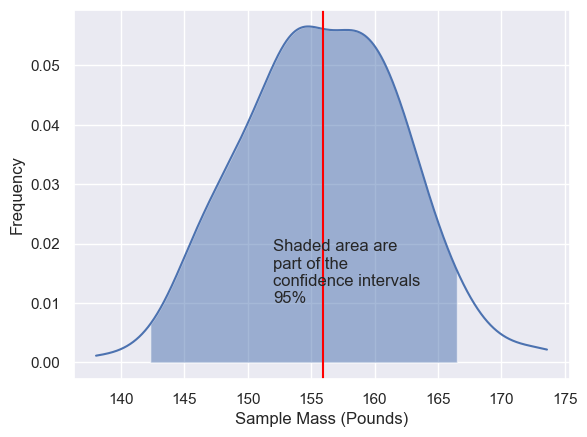

In [118]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means),np.max(sample_means),10000)
plt.plot(pos,kde(pos))
shade = np.linspace(lower_bound,upper_bound,300)
plt.fill_between(shade,kde(shade),alpha=0.5)
plt.xlabel('Sample Mass (Pounds)')
plt.ylabel('Frequency')
plt.axvline(x=mean_of_sample_means,color='red')
plt.text(x=152,y=.01,s='Shaded area are \npart of the \nconfidence intervals \n95%')

## Hypothesis Testing

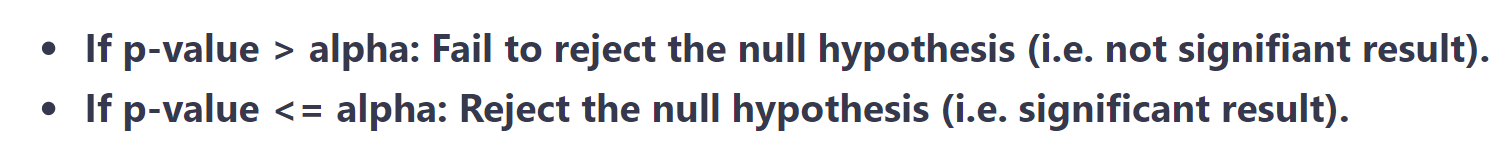

### Hypothesis Testing in Population Means

In [83]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv')
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


Uji apakah rata2 BMI dari Laki-Laki lebih tinggi dari pada rata2 BMI Perempuan.

Hipotesis:

h0: rata-rata BMI laki-laki < perempuan

h1: rata-rata BMI laki-laki > perempuan

RIAGENDR: 
* female = 2 
* Male = 1

In [84]:
females = df[df.RIAGENDR==2]
males = df[df.RIAGENDR==1]

In [119]:
#jumlah data, mean, stdev female

n_females = len(females)
mean_females = females['BMXBMI'].mean()
std_females = females['BMXBMI'].std()
print(n_females,mean_females,std_females)

2976 29.939945652173996 7.75331880954568


In [120]:
#jumlah data, mean, stdev female

n_males = len(males)
mean_males = males['BMXBMI'].mean()
std_males = males['BMXBMI'].std()
print(n_males,mean_males,std_females)

2759 28.778072111846985 7.75331880954568


In [88]:
import statsmodels.api as sm

In [91]:
alpha = 0.05

In [90]:
bmi_hypo = sm.stats.ztest(males['BMXBMI'].dropna(),females['BMXBMI'].dropna(),alternative='larger')
bmi_hypo

(-6.1755933531383205, 0.9999999996704227)

In [121]:
if bmi_hypo[1]>alpha:
    print('Accept Null Hypothesis (h0) Mean of Males BMI is not Larger than Females')
else:
    print('Reject Null Hypothesis (h0)  Mean of Males BMI is Larger than Females')

Accept Null Hypothesis (h0) Mean of Males BMI is not Larger than Females


**Data dan hipotesis berbeda**

Uji apakah mean BMI Laki Laki tidak sama dengan mean BMI Perempuan

h0 : meanL = meanP

h1: meanL != meanP

In [122]:
bmi_hypo_2s = sm.stats.ztest(males['BMXBMI'].dropna(),females['BMXBMI'].dropna(),alternative='two-sided')
bmi_hypo_2s

(-6.1755933531383205, 6.591544431126401e-10)

In [123]:
if bmi_hypo_2s[1]>alpha:
    print('Accept Null Hypothesis (h0)')
else:
    print('Reject Null Hypothesis (h0)')

Reject Null Hypothesis (h0)


### Hypothesis Testing Population Proportion

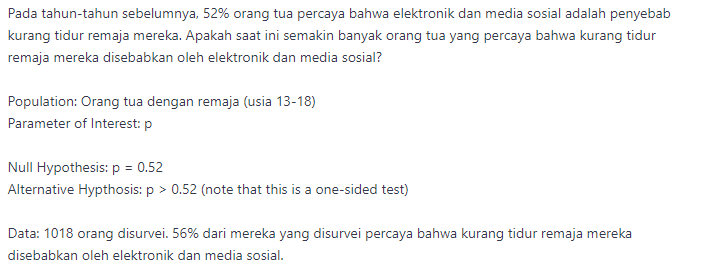

In [124]:
n = 1018
pro_null = 0.52
pro_alt = 0.56

In [125]:
pro_hypo = sm.stats.proportions_ztest(n*pro_alt,n,pro_null,alternative='larger')
pro_hypo

(2.571067795759113, 0.005069273865860533)

In [126]:
if pro_hypo[1]>alpha:
    print('Accept Null Hypothesis (h0)')
else:
    print('Reject Null Hypothesis (h0)')

Reject Null Hypothesis (h0)
